In [4]:
import os, shutil

original_dataset_dir ="/Users/nishmithasuresh/Downloads/train"    

base_dir = "/Users/tdaya/nishmithasuresh/cats_and_dogs_small"               
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')                                
os.makedirs(train_dir)
validation_dir = os.path.join(base_dir, 'validation')                      
os.makedirs(validation_dir)
test_dir = os.path.join(base_dir, 'test')                                  
os.makedirs(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')                          
os.makedirs(train_cats_dir)                                                   

train_dogs_dir = os.path.join(train_dir, 'dogs')                           
os.makedirs(train_dogs_dir)                                                   

validation_cats_dir = os.path.join(validation_dir, 'cats')                 
os.makedirs(validation_cats_dir)                                              

validation_dogs_dir = os.path.join(validation_dir, 'dogs')                 
os.makedirs(validation_dogs_dir)                                              

test_cats_dir = os.path.join(test_dir, 'cats')                             
os.makedirs(test_cats_dir)                                                    

test_dogs_dir = os.path.join(test_dir, 'dogs')                             
os.makedirs(test_dogs_dir)                                                    

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]                     
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(train_cats_dir, fname)                              
    shutil.copyfile(src, dst)                                              

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(validation_cats_dir, fname)                         
    shutil.copyfile(src, dst)                                              

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(test_cats_dir, fname)                               
    shutil.copyfile(src, dst)                                              

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]                     
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(train_dogs_dir, fname)                              
    shutil.copyfile(src, dst)                                              
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]              
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(validation_dogs_dir, fname)                         
    shutil.copyfile(src, dst)                                              

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(test_dogs_dir, fname)                               
    shutil.copyfile(src, dst)
    

In [5]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [7]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)             
test_datagen = ImageDataGenerator(rescale=1./255)              

train_generator = train_datagen.flow_from_directory(
        train_dir,                                             
        target_size=(150, 150),                                 
        batch_size=20,
        class_mode='binary')                                   

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
from PIL import Image
from sklearn.preprocessing import LabelEncoder
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 72s 705ms/step - loss: 0.6900 - acc: 0.5360 - val_loss: 0.6805 - val_acc: 0.5640
Epoch 2/30
100/100 [==============================] - 69s 693ms/step - loss: 0.6587 - acc: 0.6130 - val_loss: 0.6427 - val_acc: 0.6290
Epoch 3/30
100/100 [==============================] - 69s 694ms/step - loss: 0.6122 - acc: 0.6675 - val_loss: 0.7199 - val_acc: 0.5440
Epoch 4/30
100/100 [==============================] - 70s 700ms/step - loss: 0.5717 - acc: 0.7015 - val_loss: 0.6502 - val_acc: 0.6270
Epoch 5/30
100/100 [==============================] - 69s 692ms/step - loss: 0.5284 - acc: 0.7395 - val_loss: 0.6636 - val_acc: 0.6600
Epoch 6/30
100/100 [==============================] - 67s 672ms/step - loss: 0.5058 - acc: 0.7540 - val_loss: 0.5670 - val_acc: 0.7080
Epoch 7/30
100/100 [==============================] - 67s 668ms/step - loss: 0.4758 - acc: 0.7755 - val_loss: 0.5709 - val_acc: 0.7000
Epoch 8/30
100/100 [==============================] - 6

In [11]:
model.save('cats_and_dogs_small_1.h5')

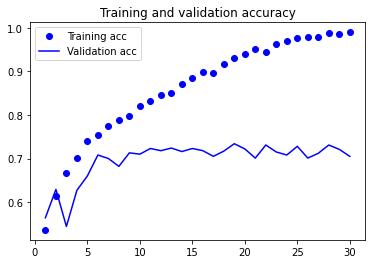

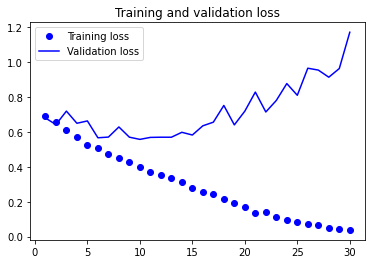

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

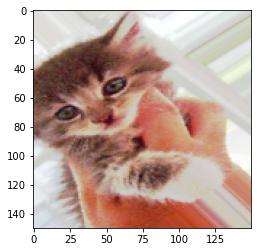

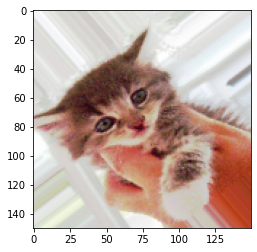

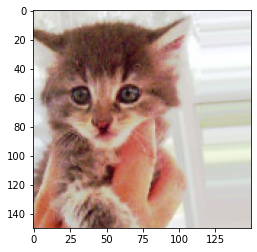

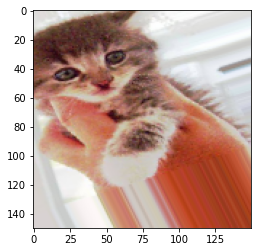

In [14]:
from keras.preprocessing import image                           

fnames = [os.path.join(train_cats_dir, fname) for
     fname in os.listdir(train_cats_dir)]

img_path = fnames[3]                                            

img = image.load_img(img_path, target_size=(150, 150))          

x = image.img_to_array(img)                                     
x = x.reshape((1,) + x.shape)                                   

i = 0                                                           
for batch in datagen.flow(x, batch_size=1):                     
    plt.figure(i)                                               
    imgplot = plt.imshow(image.array_to_img(batch[0]))          
    i += 1                                                      
    if i % 4 == 0:                                              
        break                                                   

plt.show()

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [22]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)               

train_generator = train_datagen.flow_from_directory(
        train_dir,                                              
        target_size=(150, 150),                                 
        batch_size=32,
        class_mode='binary')                                    

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      verbose=0,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
model.save('cats_and_dogs_small_2.h5')